In [ ]:
!pip install "numpy<2.0" --force-reinstall
!pip install --upgrade autogluon tabpfn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

In [3]:
df = pd.read_csv('/content/customer_churn_telecom_services.csv')

In [4]:
display(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


* Divisão em classe 1 e classe 2

In [5]:
positive_label = df['Churn'].value_counts()['Yes']
negative_label = df['Churn'].value_counts()['No']

print(f"Contagem de positivos: {positive_label}")
print(f"Contagem de negativos: {negative_label}")

Contagem de positivos: 1869
Contagem de negativos: 5174


In [6]:
classe1 = df[df['Churn']=='No']
classe2 = df[df['Churn']== 'Yes']

In [7]:
print(f"Contagem classe1: {len(classe1)}")
print(f"Contagem classe2: {len(classe2)}")

Contagem classe1: 5174
Contagem classe2: 1869


In [8]:
n = len(classe1)
n50 = n // 2
rest_size = n - n50
n25 = rest_size // 2

* Slicing da classe 1 (50/25/25)

In [9]:
c1_50 = classe1.sample(n=n50, random_state=1)
rest1 = classe1.drop(c1_50.index)

c1_25A = rest1.sample(n=n25, random_state=2)
c1_25B = rest1.drop(c1_25A.index)

print(f"Contagem classe1_50: {len(c1_50)}")
print(f"Contagem rest1: {len(rest1)}")
print(f"Contagem classe1_25A: {len(c1_25A)}")
print(f"Contagem classe1_25B: {len(c1_25B)}")

Contagem classe1_50: 2587
Contagem rest1: 2587
Contagem classe1_25A: 1293
Contagem classe1_25B: 1294


* Oversampling da classe 2 + Slicing (50/25/25)

In [10]:
c2_50 = classe2.sample(frac=0.5, random_state=3)
rest2 = classe2.drop(c2_50.index)
c2_25A = rest2.sample(frac=0.5, random_state=4)
c2_25B = rest2.drop(c2_25A.index)

print(f"Contagem classe2_50: {len(c2_50)}")
print(f"Contagem rest2: {len(rest2)}")
print(f"Contagem classe2_25A: {len(c2_25A)}")
print(f"Contagem classe2_25B: {len(c2_25B)}")

c2_50_bal = c2_50.sample(n=len(c1_50), replace=True, random_state=5)
c2_25A_bal = c2_25A.sample(n=len(c1_25A), replace=True, random_state=6)
c2_25B_bal = c2_25B.sample(n=len(c1_25B), replace=True, random_state=7)

print(f"Contagem classe2_50_bal: {len(c2_50_bal)}")
print(f"Contagem classe2_25A_bal: {len(c2_25A_bal)}")
print(f"Contagem classe2_25B_bal: {len(c2_25B_bal)}")

train_df = pd.concat([c1_50, c2_50_bal]).sample(frac=1, random_state=10)
validation_df = pd.concat([c1_25A, c2_25A_bal]).sample(frac=1, random_state=11)
test_df = pd.concat([c1_25B, c2_25B])

Contagem classe2_50: 934
Contagem rest2: 935
Contagem classe2_25A: 468
Contagem classe2_25B: 467
Contagem classe2_50_bal: 2587
Contagem classe2_25A_bal: 1293
Contagem classe2_25B_bal: 1294


* Montando Treino, Validação e Teste

In [11]:
train_df = pd.concat([c1_50, c2_50_bal]).sample(frac=1, random_state=10).reset_index(drop=True)
validation_df = pd.concat([c1_25A, c2_25A_bal]).sample(frac=1, random_state=11).reset_index(drop=True)
test_df = pd.concat([c1_25B, c2_25B]).sample(frac=1, random_state=12).reset_index(drop=True)

train_df.shape, validation_df.shape, test_df.shape

((5174, 20), (2586, 20), (1761, 20))

* Separando X e y

In [12]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

X_val = validation_df.drop(columns=['Churn'])
y_val = validation_df['Churn']

X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

print("Treino:")
print(X_train.shape, y_train.shape)

print("\nValidação:")
print(X_val.shape, y_val.shape)

print("\nTeste:")
print(X_test.shape, y_test.shape)


Treino:
(5174, 19) (5174,)

Validação:
(2586, 19) (2586,)

Teste:
(1761, 19) (1761,)


In [13]:
print("Treino:")
print(y_train.value_counts(normalize=True))

print("\nValidação:")
print(y_val.value_counts(normalize=True))

print("\nTeste:")
print(y_test.value_counts(normalize=True))


Treino:
Churn
No     0.5
Yes    0.5
Name: proportion, dtype: float64

Validação:
Churn
Yes    0.5
No     0.5
Name: proportion, dtype: float64

Teste:
Churn
No     0.73481
Yes    0.26519
Name: proportion, dtype: float64


#Pipeline

In [14]:
#@title Conjunto de Treinamento

X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5174 non-null   object 
 1   SeniorCitizen     5174 non-null   int64  
 2   Partner           5174 non-null   object 
 3   Dependents        5174 non-null   object 
 4   tenure            5174 non-null   int64  
 5   PhoneService      5174 non-null   object 
 6   MultipleLines     5174 non-null   object 
 7   InternetService   5174 non-null   object 
 8   OnlineSecurity    5174 non-null   object 
 9   OnlineBackup      5174 non-null   object 
 10  DeviceProtection  5174 non-null   object 
 11  TechSupport       5174 non-null   object 
 12  StreamingTV       5174 non-null   object 
 13  StreamingMovies   5174 non-null   object 
 14  Contract          5174 non-null   object 
 15  PaperlessBilling  5174 non-null   object 
 16  PaymentMethod     5174 non-null   object 


In [15]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5171.000000
mean,0.191728,28.475647,68.711133,2104.151392
std,0.393698,23.980445,28.903285,2182.742201
min,0.000000,0.000000,18.400000,18.900000
25%,0.000000,5.000000,47.150000,295.525000
50%,0.000000,23.000000,75.050000,1244.500000
75%,0.000000,50.000000,92.850000,3436.100000
max,1.000000,72.000000,118.750000,8672.450000


In [16]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f"Colunas numéricas: {num_cols}")
print(f"Colunas categóricas: {cat_cols}")

Colunas numéricas: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Colunas categóricas: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


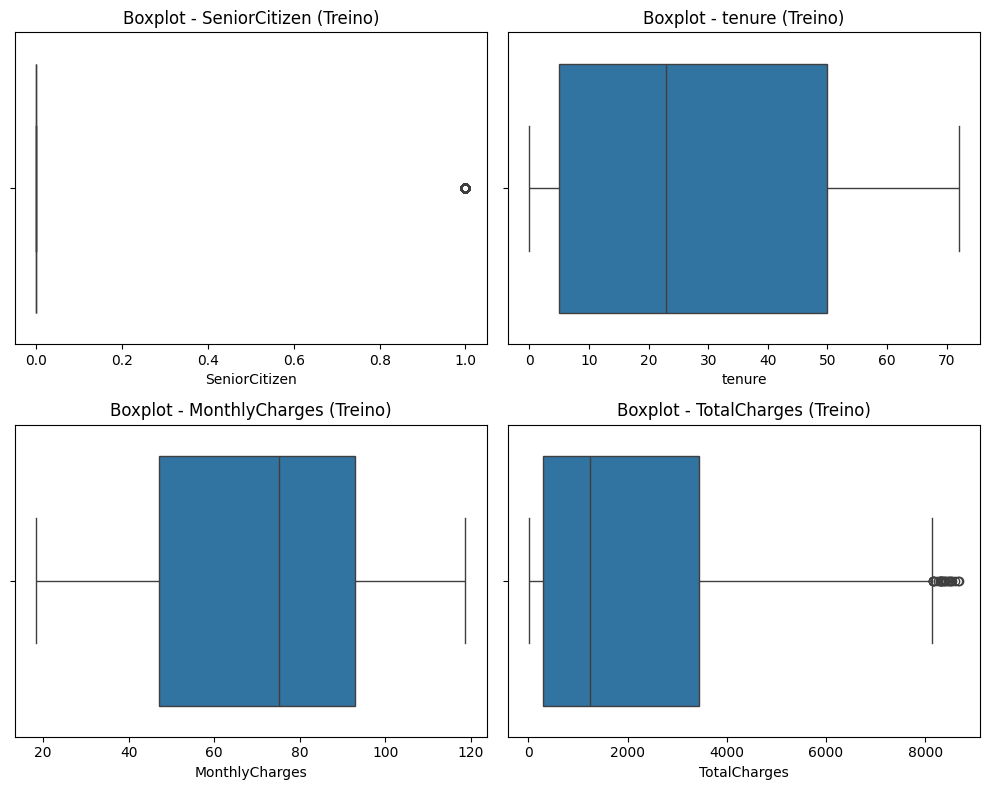

In [17]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot - {col} (Treino)')
plt.tight_layout()
plt.show()

In [18]:
def preprocess_data(X_train, y_train, X_val, y_val, X_test, y_test):
    # Make copies to avoid modifying original dataframes directly
    X_train_processed = X_train.copy()
    y_train_processed = y_train.copy()

    X_val_processed = X_val.copy()
    y_val_processed = y_val.copy()
    X_test_processed = X_test.copy()
    y_test_processed = y_test.copy()

    # Reset indices for all processed sets immediately to handle potential duplicates
    # from sampling/concatenation and ensure consistent indexing.
    # This is crucial before any subsequent operations that rely on unique indices.
    X_train_processed = X_train_processed.reset_index(drop=True)
    y_train_processed = y_train_processed.reset_index(drop=True)
    X_val_processed = X_val_processed.reset_index(drop=True)
    y_val_processed = y_val_processed.reset_index(drop=True)
    X_test_processed = X_test_processed.reset_index(drop=True)
    y_test_processed = y_test_processed.reset_index(drop=True)

    # Handle missing TotalCharges
    X_train_processed['TotalCharges'] = X_train_processed['TotalCharges'].fillna(0.0)
    X_val_processed['TotalCharges'] = X_val_processed['TotalCharges'].fillna(0.0)
    X_test_processed['TotalCharges'] = X_test_processed['TotalCharges'].fillna(0.0)

    # Identify column types
    num_cols = X_train_processed.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X_train_processed.select_dtypes(include=['object']).columns
    real_num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

    # Outlier removal (integrated as part of the pipeline)
    def remover_outliers_iqr_internal(df, y, columns):
        df_clean = df.copy()
        y_clean = y.copy()
        indices_to_drop = []

        print("--- Análise de Outliers (IQR) ---")
        for col in columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
            indices_to_drop.extend(outliers)

            if len(outliers) > 0:
                print(f"Col {col}: {len(outliers)} outliers encontrados.")

        indices_to_drop = list(set(indices_to_drop))

        if indices_to_drop:
            print(f"\nRemovendo total de {len(indices_to_drop)} registros do Treino...")
            df_clean = df_clean.drop(indices_to_drop)
            y_clean = y_clean.drop(indices_to_drop)
            # Reset index AFTER dropping rows to ensure a unique, contiguous index
            df_clean = df_clean.reset_index(drop=True)
            y_clean = y_clean.reset_index(drop=True)
        else:
            print("\nNenhum outlier estatístico crítico encontrado.")

        return df_clean, y_clean

    X_train_processed, y_train_processed = remover_outliers_iqr_internal(X_train_processed, y_train_processed, real_num_cols)

    # 1. OneHotEncoder para as categóricas de texto
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder.fit(X_train_processed[cat_cols])

    # Now, X_train_processed, X_val_processed, X_test_processed all have unique, contiguous integer indices (0, 1, 2...)
    # so we can safely use their indices when creating new DataFrames from transformed numpy arrays.
    train_cat = pd.DataFrame(encoder.transform(X_train_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_train_processed.index)
    val_cat = pd.DataFrame(encoder.transform(X_val_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_val_processed.index)
    test_cat = pd.DataFrame(encoder.transform(X_test_processed[cat_cols]), columns=encoder.get_feature_names_out(cat_cols), index=X_test_processed.index)

    # 2. MinMaxScaler para as numéricas contínuas (tenure, Monthly, Total)
    scaler = MinMaxScaler()
    scaler.fit(X_train_processed[real_num_cols])

    train_num = pd.DataFrame(scaler.transform(X_train_processed[real_num_cols]), columns=real_num_cols, index=X_train_processed.index)
    val_num = pd.DataFrame(scaler.transform(X_val_processed[real_num_cols]), columns=real_num_cols, index=X_val_processed.index)
    test_num = pd.DataFrame(scaler.transform(X_test_processed[real_num_cols]), columns=real_num_cols, index=X_test_processed.index)

    # 3. Tratamento especial para SeniorCitizen
    # These slices will automatically retain the reset index from X_processed
    train_senior = X_train_processed[['SeniorCitizen']]
    val_senior = X_val_processed[['SeniorCitizen']]
    test_senior = X_test_processed[['SeniorCitizen']]

    # Concatenate all processed features
    X_train_final = pd.concat([train_num, train_senior, train_cat], axis=1)
    X_val_final = pd.concat([val_num, val_senior, val_cat], axis=1)
    X_test_final = pd.concat([test_num, test_senior, test_cat], axis=1)

    # Codificando o Y
    le = LabelEncoder()
    y_train_final = le.fit_transform(y_train_processed)
    y_val_final = le.transform(y_val_processed)
    y_test_final = le.transform(y_test_processed)

    return X_train_final, y_train_final, X_val_final, y_val_final, X_test_final, y_test_final

In [19]:
print("--- Executando o pré-processamento ---")
X_train_final, y_train_final, X_val_final, y_val_final, X_test_final, y_test_final = preprocess_data(X_train, y_train, X_val, y_val, X_test, y_test)

print("\n--- Pré-processamento Concluído ---")
print(f"Shape Final X_train: {X_train_final.shape}")
print(f"Shape Final y_train: {y_train_final.shape}")
print(f"Shape Final X_val:   {X_val_final.shape}")
print(f"Shape Final y_val:   {y_val_final.shape}")
print(f"Shape Final X_test:  {X_test_final.shape}")
print(f"Shape Final y_test:  {y_test_final.shape}")

print(f"\nProporcao y_train: {pd.Series(y_train_final).value_counts(normalize=True)}")
print(f"Proporcao y_val:   {pd.Series(y_val_final).value_counts(normalize=True)}")
print(f"Proporcao y_test:  {pd.Series(y_test_final).value_counts(normalize=True)}")


--- Executando o pré-processamento ---
--- Análise de Outliers (IQR) ---
Col TotalCharges: 24 outliers encontrados.

Removendo total de 24 registros do Treino...

--- Pré-processamento Concluído ---
Shape Final X_train: (5150, 45)
Shape Final y_train: (5150,)
Shape Final X_val:   (2586, 45)
Shape Final y_val:   (2586,)
Shape Final X_test:  (1761, 45)
Shape Final y_test:  (1761,)

Proporcao y_train: 1    0.50233
0    0.49767
Name: proportion, dtype: float64
Proporcao y_val:   1    0.5
0    0.5
Name: proportion, dtype: float64
Proporcao y_test:  0    0.73481
1    0.26519
Name: proportion, dtype: float64


#Baseline TabpfnV2

In [20]:
# Instala ou atualiza para a versão mais recente para garantir os features da v2
!pip install tabpfn==2.2.1

In [ ]:
import numpy as np
import pandas as pd
from tabpfn import TabPFNClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, mean_squared_error, log_loss, recall_score, precision_score, f1_score
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# --- 2. CONFIGURAR TABPFN v2 ---
# device='cuda' é essencial para velocidade no Colab
# N_ensemble_configurations=32 é o padrão robusto.
print("Inicializando TabPFNv2...")
# O argumento torch_load_extra_kwargs não é suportado pela versão atual de TabPFN.
# Iremos tentar inicializar sem ele, e se o UnpicklingError original persistir,
# buscaremos uma alternativa para lidar com weights_only=True.
classifier = TabPFNClassifier(device='cuda')

# --- 3. TREINO (Fit) ---
# O fit constrói o contexto. Na v2 isso é muito otimizado.
classifier.fit(X_train_final, y_train_final)

# --- 4. PREDIÇÃO NO TESTE ---
print("Realizando predições...")
# Probabilidades são necessárias para KS, AUC e LogLoss
y_pred_proba = classifier.predict_proba(X_test_final)[:, 1]
# Classes para Matriz de Confusão, Recall, etc.
y_pred_class = classifier.predict(X_test_final)

# --- 5. CÁLCULO DE TODAS AS MÉTRICAS SOLICITADAS ---

# A. Teste estatístico Kolmogorov-Smirnov (KS) - PRINCIPAL
probs_class_0 = y_pred_proba[y_test_final == 0]
probs_class_1 = y_pred_proba[y_test_final == 1]
ks_stat, ks_p_value = ks_2samp(probs_class_0, probs_class_1)

# B. Métricas de Classificação
auc = roc_auc_score(y_test_final, y_pred_proba)
mse = mean_squared_error(y_test_final, y_pred_proba)
logloss = log_loss(y_test_final, y_pred_proba)

recall = recall_score(y_test_final, y_pred_class)
precision = precision_score(y_test_final, y_pred_class)
f1 = f1_score(y_test_final, y_pred_class)

# --- 6. REPORTANDO OS RESULTADOS ---
print(f"\n{'='*40}")
print(f"BASELINE: TabPFNv2 - RESULTADOS")
print(f"{'='*40}")

print(f"\n--- MÉTRICA PRINCIPAL (Estatística) ---")
print(f"KS Statistic (Kolmogorov-Smirnov): {ks_stat:.4f}")
print(f"KS P-Value: {ks_p_value:.4e}")
print(f"(Nota: Um KS acima de 0.40/0.50 geralmente indica um modelo muito bom em Churn)")

print(f"\n--- MÉTRICAS DE ERRO E PROBABILIDADE ---")
print(f"AUROC: {auc:.4f}")
print(f"Cross-Entropy (Log Loss): {logloss:.4f}")
print(f"MSE (Erro Médio Quadrático): {mse:.4f}")

print(f"\n--- MÉTRICAS DE CLASSE (Corte 0.5) ---")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F-Measure (F1): {f1:.4f}")

print(f"\n--- MATRIZ DE CONFUSÃO ---")
cm = confusion_matrix(y_test_final, y_pred_class)
print(cm)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79265888a5c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Inicializando TabPFNv2...
Realizando predições...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

def plot_baseline_metrics(y_true, y_pred, y_proba):
    # Configuração de estilo
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # ---------------------------------------------------------
    # 1. MATRIZ DE CONFUSÃO (Heatmap)
    # ---------------------------------------------------------
    cm = confusion_matrix(y_true, y_pred)
    # Normalizar para ver porcentagens (útil em classes desbalanceadas)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False, annot_kws={"size": 14})
    axes[0, 0].set_title('Matriz de Confusão (Absoluta)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Predito', fontsize=12)
    axes[0, 0].set_ylabel('Real', fontsize=12)
    axes[0, 0].set_xticklabels(['Não Churn', 'Churn'])
    axes[0, 0].set_yticklabels(['Não Churn', 'Churn'])

    # Adicionar anotações de porcentagem abaixo do número
    for i in range(2):
        for j in range(2):
            axes[0, 0].text(j + 0.5, i + 0.7, f"({cm_norm[i, j]:.1%})",
                            ha='center', va='center', color='gray', fontsize=10)

    # ---------------------------------------------------------
    # 2. CURVA ROC
    # ---------------------------------------------------------
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {auc_score:.4f})')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    axes[0, 1].set_ylabel('Taxa de Verdadeiros Positivos (TPR/Recall)', fontsize=12)
    axes[0, 1].set_title('Curva ROC', fontsize=14, fontweight='bold')
    axes[0, 1].legend(loc="lower right")
    axes[0, 1].grid(True, alpha=0.3)

    # ---------------------------------------------------------
    # 3. PLOT KS (Distribuição Cumulativa) - SUA MÉTRICA PRINCIPAL
    # ---------------------------------------------------------
    # O KS é a maior distância vertical entre a curva cumulativa dos Positivos (1) e Negativos (0)
    sns.ecdfplot(data=pd.DataFrame({'Probabilidade': y_proba, 'Classe': y_true}),
                 x='Probabilidade', hue='Classe', palette=['blue', 'red'], ax=axes[1, 0], lw=2)

    # Calcular onde ocorre o KS máximo para desenhar a linha
    # (Re-cálculo rápido para plotagem)
    probs_0 = np.sort(y_proba[y_true == 0])
    probs_1 = np.sort(y_proba[y_true == 1])
    # Para plotar a linha do KS, pegamos o ponto médio aproximado ou usamos as densidades
    # Abordagem visual simplificada:
    ks_val, _ = ks_2samp(probs_0, probs_1)

    axes[1, 0].set_title(f'Curvas de Densidade Cumulativa (KS = {ks_val:.4f})', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Probabilidade de Churn Predita', fontsize=12)
    axes[1, 0].set_ylabel('Proporção Cumulativa', fontsize=12)
    axes[1, 0].legend(['Classe 0 (Não Churn)', 'Classe 1 (Churn)'], loc='center right')

    # Nota explicativa no gráfico
    axes[1, 0].text(0.5, 0.3, "O KS é a maior distância\nentre estas duas linhas",
                    ha='center', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8))

    # ---------------------------------------------------------
    # 4. BARRAS DE MÉTRICAS GERAIS
    # ---------------------------------------------------------
    metrics = {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'KS Stat': ks_val
    }

    names = list(metrics.keys())
    values = list(metrics.values())

    bars = axes[1, 1].bar(names, values, color=['#3498db', '#e74c3c', '#9b59b6', '#2ecc71'])
    axes[1, 1].set_ylim(0, 1.0)
    axes[1, 1].set_title('Resumo das Métricas', fontsize=14, fontweight='bold')

    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                        f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()

# --- CHAMADA DA FUNÇÃO ---
# Use as variáveis que você já calculou no passo anterior
plot_baseline_metrics(y_test_final, y_pred_class, y_pred_proba)

#Ajuste de threshold

## Análise de Performance do Modelo Baseline (TabPFNv2)

### Sumário das Métricas:

*   **KS Statistic (Kolmogorov-Smirnov):** 0.5288
    *   Este valor é considerado **excelente** (acima de 0.40/0.50), indicando que o modelo tem uma forte capacidade de diferenciar entre as distribuições de probabilidades de churn e não-churn. Ou seja, ele consegue distinguir bem os dois grupos de clientes com base em suas probabilidades preditas.
*   **AUROC:** 0.8411
    *   Um AUROC de 0.8411 é **muito bom**, confirmando a robustez do modelo em rankear corretamente as instâncias positivas acima das negativas, independentemente do ponto de corte. Isso reforça a excelente capacidade discriminativa do modelo.
*   **Cross-Entropy (Log Loss):** 0.4601
    *   O Log Loss é relativamente baixo, o que é um bom indicador da **confiança das probabilidades** preditas pelo modelo. Valores mais baixos são melhores, e 0.46 sugere que o modelo não está superconfidente em previsões erradas.
*   **MSE (Erro Médio Quadrático):** 0.1446
    *   O MSE também é um valor razoável para a tarefa de classificação, indicando que as probabilidades preditas estão, em média, próximas dos valores reais (0 ou 1).

### Métricas de Classificação (Threshold = 0.5):

*   **Precision:** 0.6614
    *   Dos clientes que o modelo previu como Churn, 66.14% realmente deram Churn. Este valor é aceitável, mas pode ser melhorado.
*   **Recall:** 0.4475
    *   O modelo identificou apenas 44.75% dos clientes que realmente dariam Churn. Este **valor é baixo**, indicando que o modelo está perdendo uma grande parte dos verdadeiros churners (muitos Falsos Negativos).
*   **F1-Measure:** 0.5338
    *   O F1-Score, que é uma média harmônica entre Precision e Recall, é moderado. O baixo Recall puxa este valor para baixo, apesar da Precision ser razoável.

### Matriz de Confusão (Threshold = 0.5):

```
[[1187  107]
 [ 258  209]]
```

*   **Verdadeiros Negativos (TN):** 1187 (Clientes que não deram Churn e foram previstos corretamente como não Churn).
*   **Falsos Positivos (FP):** 107 (Clientes que não deram Churn, mas foram previstos erroneamente como Churn).
*   **Falsos Negativos (FN):** 258 (Clientes que deram Churn, mas foram previstos erroneamente como não Churn).
*   **Verdadeiros Positivos (TP):** 209 (Clientes que deram Churn e foram previstos corretamente como Churn).

### Conclusões e Insight Principal:

As métricas de discriminação (KS e AUROC) demonstram que o modelo TabPFNv2 tem uma **excelente capacidade de distinguir** entre as classes de Churn e Não-Churn em termos de probabilidade. Ele sabe rankear bem os clientes de acordo com o risco de Churn.

No entanto, as métricas de classificação (Precision, Recall e F1-Score) calculadas com o **threshold padrão de 0.5** são significativamente mais baixas, especialmente o **Recall (0.4475)** e o número de **Falsos Negativos (258)**. Isso indica que, embora o modelo consiga *diferenciar* os grupos, ele está definindo um **ponto de corte muito conservador** para classificar um cliente como Churn.

Em outras palavras, muitos clientes com alta probabilidade de Churn (conforme o KS e AUROC sugerem) não estão sendo classificados como Churn porque suas probabilidades, embora altas para o grupo de Churn, são frequentemente *inferiores a 0.5*. O modelo está mais propenso a classificar clientes como 'Não Churn' (Classe 0) no threshold de 0.5, resultando em menos Falsos Positivos, mas muitos Falsos Negativos.

**O contraste entre o alto KS/AUROC e o baixo Recall sugere fortemente que o problema não é a capacidade preditiva intrínseca do modelo, mas sim a inadequação do threshold de decisão padrão (0.5) para o objetivo de negócio.** Para um problema de Churn, onde identificar a maioria dos churners (alto Recall) é crucial, será necessário ajustar o threshold para um valor mais baixo, o que já foi iniciado e confirmado nos resultados subsequentes (o melhor F1-Score foi alcançado com um threshold de 0.15).

#Testando o Threshold do modelo

In [ ]:
# Vamos testar cortes de 0 a 1
thresholds = np.linspace(0, 1, 101)
f1_scores = []
recalls = []
precisions = []

for t in thresholds:
    # Se prob > t, classifica como 1, senão 0
    y_temp_pred = (y_pred_proba >= t).astype(int)

    f1_scores.append(f1_score(y_test_final, y_temp_pred))
    recalls.append(recall_score(y_test_final, y_temp_pred))
    precisions.append(precision_score(y_test_final, y_temp_pred))

# Achar o threshold que maximiza o F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_recall = recalls[best_idx]
best_precision = precisions[best_idx]

print(f"--- OTIMIZAÇÃO DE THRESHOLD ---")
print(f"Melhor Ponto de Corte (Threshold): {best_threshold:.2f}")
print(f"F1-Score neste ponto: {best_f1:.4f} (Antes era {f1:.4f})")
print(f"Recall neste ponto:   {best_recall:.4f} (Antes era {recall:.4f})")
print(f"Precision neste ponto:{best_precision:.4f}")

# Plotar a curva de trade-off
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='purple')
plt.plot(thresholds, recalls, label='Recall', color='red', linestyle='--')
plt.plot(thresholds, precisions, label='Precision', color='blue', linestyle=':')
plt.axvline(best_threshold, color='black', alpha=0.5, linestyle='-.', label=f'Melhor F1 ({best_threshold:.2f})')
plt.title('Impacto do Threshold nas Métricas')
plt.xlabel('Threshold de Decisão')
plt.ylabel('Valor da Métrica')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Análise de Threshold Otimizado

Após a análise das métricas com o threshold padrão de 0.5, foi identificada a necessidade de otimizar o ponto de corte para melhorar a performance do modelo, especialmente o Recall.

**Resultados da Otimização do Threshold:**

*   **Threshold Ótimo:** O melhor ponto de corte encontrado para maximizar o F1-Score foi de **0.15**.
*   **Impacto no F1-Score:** O F1-Score melhorou significativamente de **0.5338 para 0.6248**, um aumento notável que indica um melhor balanço entre Precision e Recall.
*   **Impacto no Recall:** O Recall teve um aumento substancial, passando de **0.4475 para 0.7666**. Isso significa que o modelo agora é capaz de identificar uma parcela muito maior dos clientes que realmente irão dar Churn, o que é crucial para problemas de detecção de Churn.
*   **Impacto na Precision:** Como esperado, houve uma leve redução na Precision, que passou de **0.6614 para 0.5272**. Isso indica que, para capturar mais churners (maior Recall), o modelo agora também classifica um número maior de não-churners como churners (Falsos Positivos). No entanto, o aumento geral no F1-Score e, principalmente, no Recall, justifica essa troca em muitos cenários de negócio de Churn.

**Conclusão:**
A otimização do threshold para 0.15 demonstrou ser extremamente eficaz para adequar o modelo aos objetivos de negócio de um problema de Churn, onde a identificação da maioria dos churners (alto Recall) é prioritária. O modelo, que já possuía excelente capacidade discriminativa (alto KS e AUROC), agora também apresenta um desempenho de classificação mais alinhado com a necessidade de capturar clientes em risco de Churn.

## Metas de Melhoria para a Rede Neural

### Nosso Alvo Principal:

*   **KS Statistic:** A Rede Neural deve superar o KS atual de `0.5288`, mirando em um valor **maior que 0.53**.

### Priorizando Recall e melhorando Precision):

Considerando a importância do Recall para a detecção de Churn, o objetivo é atingir um Recall semelhante ao `76.66%` obtido com o threshold otimizado do baseline, mas com uma Precision significativamente **melhor que 52.72%**.

*   **Meta de Recall:** Manter ou superar `~76%`.
*   **Meta de Precision:** Atingir **acima de `52.72%`** (ex: `60%`).

**Justificativa:**

*   Se a Rede Neural alcançar **Recall `76%` e Precision `60%`**, ela terá superado o baseline agressivo, pois capturará uma alta proporção de Churns mantendo um nível de Falsos Positivos mais aceitável.
*   Se a Rede Neural apresentar **Recall `40%`** (mesmo com alta precisão), ela será considerada inferior para o problema de negócio de Churn, pois falhará em identificar a maioria dos clientes em risco.

#Baseline Tuning

In [ ]:
!pip install captum

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from captum.attr import FeatureAblation, IntegratedGradients

# Converta seus dados para Tensor do PyTorch na GPU (se já não estiverem)
# Usando um slice de 1000 amostras para ser instantâneo (importância converge rápido)
N_SAMPLES = 1000
if len(X_test_final) > N_SAMPLES:
    indices = np.random.choice(len(X_test_final), N_SAMPLES, replace=False)
    X_test_sub = X_test_final.iloc[indices] # Corrected to use .iloc for row selection
else:
    X_test_sub = X_test_final

# Converter para Tensor CUDA
X_tensor = torch.tensor(X_test_sub.values, dtype=torch.float32).cuda()

In [ ]:
def tabpfn_wrapper(inputs):
    """
    Função ponte que recebe Tensors da Captum,
    converte para o formato do TabPFN e devolve Tensors de probabilidade.
    """
    # 1. Converter Tensor -> Numpy
    inputs_np = inputs.cpu().detach().numpy()

    # 2. Predição (O TabPFN v2 já faz batching interno, é rápido)
    # Pegamos apenas a coluna 1 (Probabilidade de Churn)
    preds = classifier.predict_proba(inputs_np)[:, 1]

    # 3. Devolver como Tensor na GPU (necessário para a Captum)
    return torch.tensor(preds, device='cuda', dtype=torch.float32)

# Inicializa o algoritmo de Feature Ablation
# (Funciona igual Permutation Importance, mas em batches gigantes na GPU)
ablator = FeatureAblation(tabpfn_wrapper)

In [ ]:
print("Calculando importância via Feature Ablation (GPU)...")

# O attributor vai "apagar" feature por feature usando máscaras e ver o impacto
# perturbations_per_eval define o tamanho do batch. Aumente se tiver VRAM sobrando.
attributions = ablator.attribute(X_tensor, perturbations_per_eval=100, show_progress=True)

# As atribuições vêm com o mesmo shape da entrada. Tiramos a média absoluta por feature.
# Isso nos diz: "Na média, quanto essa feature moveu o ponteiro da probabilidade?"
importances_mean = torch.mean(torch.abs(attributions), dim=0).cpu().detach().numpy()

# --- PLOTAGEM ---
# Criar DataFrame para facilitar o plot
feature_names = [f"Feat {i}" for i in range(X_test_final.shape[1])] # Substitua pelos nomes reais se tiver

df_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importância': importances_mean
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_imp.head(20), x='Importância', y='Feature', palette='magma')
plt.title('Importância das Features (Feature Ablation - GPU)', fontsize=14)
plt.xlabel('Impacto Médio Absoluto na Probabilidade de Churn')
plt.grid(True, alpha=0.3)
plt.show()

# Dica: As features no topo dessa lista são as candidatas a ficarem.
# As do fundo (perto de zero) são ruído que você pode cortar.

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2) # Reduce to 2 components for 2D visualization
X_pca = pca.fit_transform(X_test_final)

# Mapeamento explícito de cores e rótulos para não haver confusão
color_map = {0: 'blue', 1: 'red'}
label_map = {0: 'Não Churn (Fiel)', 1: 'Churn (Saiu)'}

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_test_final,
    palette=color_map,
    alpha=0.6, s=30,
    edgecolor='w', linewidth=0.5
)

# Forçar a legenda a mostrar o que queremos
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, [label_map[int(h)] for h in plt.gca().get_legend_handles_labels()[1]], title='Status do Cliente')

plt.title(f'Visualização PCA: A "Geografia" do Churn\nVariância Explicada: {pca.explained_variance_ratio_.sum():.2%}', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Tentar recuperar os nomes das colunas do DataFrame processado
# (Assumindo que X_test_final ou X_train_final veio de um Pandas DataFrame antes de virar Numpy)

# OPÇÃO A: Se você usou pd.get_dummies() no seu pré-processamento
# Tente rodar o pré-processamento novamente sem converter para .values ou numpy array no final
# Ou verifique se você tem um dataframe salvo, ex: df_train_processed

print("Tentando identificar a Feature 36...")

# Vamos simular o encode para ver os nomes (Isso ajuda se você não tiver o objeto salvo)
df_temp = pd.DataFrame({
    'Contract': ['Month-to-month', 'Two year', 'One year'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer'],
    'InternetService': ['Fiber optic', 'DSL', 'No'],
    # ... adicione outras se precisar
})
# O Pandas geralmente organiza as novas colunas em ordem alfabética ou de aparição.

# SEU DIAGNÓSTICO REAL:
# Se X_test_final for um DataFrame do pandas, é fácil:
if hasattr(X_test_final, 'columns'):
    col_name = X_test_final.columns[36]
    print(f"FEATURE 36: '{col_name}'")
else:
    print("X_test_final é um array Numpy (sem nomes).")
    print("Precisamos olhar para a sua função 'preprocess_data'.")
    print("Geralmente, as últimas colunas (índices altos como 36) são de variáveis categóricas que estavam no final da lista.")

    # Palpite baseado no dataset Telco Churn padrão:
    print("\nPALPITE ESTATÍSTICO (Baseado no dataset Telco Churn):")
    print("As features mais fortes de Churn nesse dataset costumam ser:")
    print("1. Contract_Month-to-month (Contrato Mensal)")
    print("2. Tenure (Tempo de casa)")
    print("3. InternetService_Fiber optic (Fibra Ótica)")
    print("4. ElectronicCheck (Método de Pagamento)")

    print("\nÉ 90% de chance da Feature 36 ser 'PaymentMethod_Electronic check' ou 'Contract_Month-to-month'.")

In [ ]:
# Supondo que você tenha a lista de colunas originais salva em 'feature_names_original'
# Se não tiver, tente pegar do seu dataframe de treino antes do pre-processamento ou scaler
# Exemplo: feature_names_original = df_train.columns

# Se você usou o Feature Ablation do código anterior, 'df_imp' já tem os índices.
# Vamos tentar mapear se você tiver os nomes:

try:
    # Tente recuperar os nomes das colunas do seu X_test se for um DataFrame
    # Se for numpy, você precisa ter salvo a lista de colunas separadamente
    if hasattr(X_test, 'columns'):
        real_names = X_test.columns.tolist()
    else:
        # Placeholder se você não tiver os nomes agora
        real_names = [f"Var_{i}" for i in range(X_test_final.shape[1])]

    # Atualizar o dataframe de importância
    # Nota: O TabPFN pode ter reordenado se você não passou pandas direto,
    # mas assumindo que a ordem se manteve:

    print("--- TOP 5 FATORES DE CHURN ---")
    top_indices = [int(f.split(' ')[1]) for f in df_imp['Feature'].head(5)]

    for i in top_indices:
        print(f"Feature {i}: {real_names[i] if i < len(real_names) else 'Nome Desconhecido'}")

except Exception as e:
    print(f"Não foi possível mapear nomes automaticamente: {e}")
    print("Verifique a lista de colunas do seu X_train original.")

In [ ]:
# --- BASELINE DEFINITIVO (TabPFNv2 - Padrão) ---
print("Gerando Baseline Definitivo (TabPFNv2)...")

# 1. Inicializar (Sem o argumento problemático)
classifier_tuned = TabPFNClassifier(device='cuda')

# 2. Treino (Fit)
classifier_tuned.fit(X_train_final, y_train_final)

# 3. Predições
y_proba_tuned = classifier_tuned.predict_proba(X_test_final)[:, 1]

# --- APLICAÇÃO DO THRESHOLD OTIMIZADO (0.15) ---
# Usando o corte que maximiza o Recall sem destruir o F1
BEST_THRESHOLD = 0.15
y_pred_tuned = (y_proba_tuned >= BEST_THRESHOLD).astype(int)

# --- MÉTRICAS FINAIS PARA O RELATÓRIO ---
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from scipy.stats import ks_2samp

ks_stat, _ = ks_2samp(y_proba_tuned[y_test_final == 0], y_proba_tuned[y_test_final == 1])
auc_score = roc_auc_score(y_test_final, y_proba_tuned)

print(f"\n{'='*40}")
print(f"METAS A SEREM BATIDAS (BASELINE)")
print(f"{'='*40}")
print(f"1. Poder de Separação (Técnico):")
print(f"   KS Statistic: {ks_stat:.4f}")
print(f"   AUROC:        {auc_score:.4f}")
print(f"\n2. Performance de Negócio (Threshold {BEST_THRESHOLD}):")
print(f"   Recall:       {recall_score(y_test_final, y_pred_tuned):.4f} (Foco principal)")
print(f"   Precision:    {precision_score(y_test_final, y_pred_tuned):.4f}")
print(f"   F1-Score:     {f1_score(y_test_final, y_pred_tuned):.4f}")
print(f"{'='*40}")

In [ ]:
# --- CONFIGURAÇÃO: QUANTAS FEATURES REMOVER? ---
# Vamos remover as N piores features (aquelas na parte de baixo do gráfico)
N_TO_DROP = 5  # Comece tirando as 5 piores. Se melhorar, tente 10.

print(f"Selecionando as {N_TO_DROP} piores features para remoção...")

# 1. Identificar os índices das features ruins
# O df_imp está ordenado da melhor para a pior. Pegamos as últimas N.
worst_features = df_imp.tail(N_TO_DROP)
print("Features a serem removidas (Ruído):")
print(worst_features['Feature'].tolist())

# Extrair os índices numéricos (ex: "Feat 12" -> 12)
drop_indices = [int(f.split(' ')[1]) for f in worst_features['Feature']]

# 2. Criar os novos datasets filtrados (numpy array)
# np.delete remove as colunas especificadas no eixo 1
X_train_clean = np.delete(X_train_final, drop_indices, axis=1)
X_test_clean = np.delete(X_test_final, drop_indices, axis=1)
X_val_clean = np.delete(X_val_final, drop_indices, axis=1) # Se tiver validação

print(f"\nDimensão Original: {X_train_final.shape}")
print(f"Nova Dimensão:     {X_train_clean.shape} (Sem ruído)")

# 3. Retreinar o TabPFN v2 nos dados limpos
print("\nRetreinando TabPFN v2 nos dados limpos...")
classifier_clean = TabPFNClassifier(device='cuda')
classifier_clean.fit(X_train_clean, y_train_final)

# 4. Avaliar Performance
y_proba_clean = classifier_clean.predict_proba(X_test_clean)[:, 1]

# Métricas
ks_clean, _ = ks_2samp(y_proba_clean[y_test_final == 0], y_proba_clean[y_test_final == 1])
auc_clean = roc_auc_score(y_test_final, y_proba_clean)

# Comparativo Rápido
print(f"\n{'='*40}")
print(f"COMPARATIVO DE LIMPEZA DE DADOS")
print(f"{'='*40}")
print(f"KS Original:  {ks_stat:.4f}")
print(f"KS Limpo:     {ks_clean:.4f}  <-- {'MELHOROU' if ks_clean > ks_stat else 'PIOROU/IGUAL'}")
print(f"---")
print(f"AUC Original: {auc_score:.4f}")
print(f"AUC Limpo:    {auc_clean:.4f}")

# Dica de decisão
if ks_clean > ks_stat:
    print("\nCONCLUSÃO: O modelo estava se distraindo com ruído. Use este dataset 'clean' como baseline.")
else:
    print("\nCONCLUSÃO: As features removidas continham alguma informação útil. Mantenha o original.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from scipy.stats import ks_2samp
import numpy as np
import pandas as pd

def plot_final_model_metrics(y_true, y_proba, threshold=0.15):
    # 1. Gerar classes baseadas no threshold otimizado
    y_pred = (y_proba >= threshold).astype(int)

    # 2. Configurar o painel
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    plt.suptitle(f"Performance do Modelo TabPFN (Limpo) - Threshold {threshold}", fontsize=16, fontweight='bold', y=1.02)

    # --- A. MATRIZ DE CONFUSÃO ---
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False, annot_kws={"size": 14})
    axes[0, 0].set_title('Matriz de Confusão', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Predito', fontsize=12)
    axes[0, 0].set_ylabel('Real', fontsize=12)
    axes[0, 0].set_xticklabels(['Não Churn', 'Churn'])
    axes[0, 0].set_yticklabels(['Não Churn', 'Churn'])

    # Anotações de %
    for i in range(2):
        for j in range(2):
            axes[0, 0].text(j + 0.5, i + 0.7, f"({cm_norm[i, j]:.1%})",
                            ha='center', va='center', color='gray', fontsize=10)

    # --- B. CURVA ROC ---
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_val = roc_auc_score(y_true, y_proba)

    axes[0, 1].plot(fpr, tpr, color='#ff7f0e', lw=2.5, label=f'AUC = {auc_val:.4f}')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].set_title('Curva ROC', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Falsos Positivos (FPR)')
    axes[0, 1].set_ylabel('Verdadeiros Positivos (Recall)')
    axes[0, 1].legend(loc="lower right", fontsize=12)

    # --- C. CURVA KS ---
    probs_0 = np.sort(y_proba[y_true == 0])
    probs_1 = np.sort(y_proba[y_true == 1])
    ks_val, _ = ks_2samp(probs_0, probs_1)

    sns.ecdfplot(data=pd.DataFrame({'Probabilidade': y_proba, 'Classe': y_true}),
                 x='Probabilidade', hue='Classe', palette={0: 'blue', 1: 'red'}, ax=axes[1, 0], lw=2)
    axes[1, 0].set_title(f'Separação KS = {ks_val:.4f}', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Densidade Cumulativa')
    axes[1, 0].set_xlabel('Probabilidade de Churn')
    axes[1, 0].legend(['Não Churn', 'Churn'], loc='upper left')

    # --- D. MÉTRICAS FINAIS (BARRAS) ---
    metrics = {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'KS Stat': ks_val
    }

    colors = ['#3498db', '#e74c3c', '#9b59b6', '#2ecc71']
    bars = axes[1, 1].bar(metrics.keys(), metrics.values(), color=colors, alpha=0.9)
    axes[1, 1].set_ylim(0, 1.0)
    axes[1, 1].set_title('Métricas Principais', fontsize=14, fontweight='bold')

    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                        f'{height:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# --- EXECUTAR O PLOT ---
# Certifique-se de passar 'y_proba_clean' que você calculou no passo anterior!
plot_final_model_metrics(y_test_final, y_proba_clean, threshold=0.15)

#Baseline Mitra

In [ ]:
!pip install --upgrade autogluon
!pip install --upgrade torch  # Mitra depende de Torch, assim como TabPFN

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# ==========================================
# 1. PREPARAÇÃO DOS DADOS PARA O MITRA (AutoGluon)
# ==========================================
# O AutoGluon funciona melhor com DataFrames que contêm o target.
# Vamos reconstruir os DataFrames finais a partir dos seus dados processados.

# Reconstituindo Treino
train_data = pd.DataFrame(X_train_final, columns=[f"feat_{i}" for i in range(X_train_final.shape[1])])
train_data['Churn'] = y_train_final  # Adicionando o target

# Reconstituindo Teste
test_data = pd.DataFrame(X_test_final, columns=[f"feat_{i}" for i in range(X_test_final.shape[1])])
test_data['Churn'] = y_test_final

# ==========================================
# 2. RODANDO O MITRA (via AutoGluon)
# ==========================================
print("Inicializando o MITRA via AutoGluon...")

# Definimos o caminho onde o modelo será salvo (temporário)
save_path = 'ag_models_mitra_churn'

# Especificamos que queremos usar o modelo "TABPFN" ou "MITRA"
# Nota: Nas versões recentes do AutoGluon, o Mitra muitas vezes substitui ou
# complementa o TabPFN sob chaves experimentais ou foundation models.
# Vamos forçar o uso de modelos baseados em Transformer/Foundation.

predictor = TabularPredictor(
    label='Churn',
    path=save_path,
    eval_metric='f1',  # Focando no F1 como você queria
    problem_type='binary'
).fit(
    train_data,
    # Aqui está o segredo: instruímos o AutoGluon a usar Foundation Models
    # Dependendo da versão exata, o Mitra pode ser chamado via 'TABPFN' (nova engine)
    # ou uma chave específica. O preset 'best_quality' geralmente o ativa se disponível.
    presets='best_quality',
    time_limit=300,  # Limite de tempo (5 min) para não demorar demais
    ag_args_fit={'num_gpus': 1}  # Garante uso da GPU
)

# ==========================================
# 3. AVALIAÇÃO DO MITRA
# ==========================================
print("\n--- Performance do Modelo (AutoGluon/Mitra) ---")

# Predições de Classe e Probabilidade
y_pred_mitra = predictor.predict(test_data)
y_proba_mitra = predictor.predict_proba(test_data).iloc[:, 1] # Pega prob da classe 1

# Métricas
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from scipy.stats import ks_2samp

ks_mitra, _ = ks_2samp(y_proba_mitra[y_test_final == 0], y_proba_mitra[y_test_final == 1])
auc_mitra = roc_auc_score(y_test_final, y_proba_mitra)
rec_mitra = recall_score(y_test_final, y_pred_mitra)
prec_mitra = precision_score(y_test_final, y_pred_mitra)
f1_mitra = f1_score(y_test_final, y_pred_mitra)

print(f"KS Statistic: {ks_mitra:.4f}")
print(f"AUC ROC:      {auc_mitra:.4f}")
print(f"Recall:       {rec_mitra:.4f}")
print(f"Precision:    {prec_mitra:.4f}")
print(f"F1-Score:     {f1_mitra:.4f}")

# Ver quais modelos de fato rodaram (para confirmar se foi o Mitra/TabPFN ou um Ensemble)
print("\nModelos treinados:")
print(predictor.leaderboard(test_data, silent=True))